# Simple Flavor Mixing (Obsolete)

Illustrate very basic neutrino flavor mixing in supernova neutrinos using the `SimpleMixing` class in ASTERIA.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import astropy.units as u

from asteria import config, source
from asteria.neutrino import Flavor
from asteria.oscillation import SimpleMixing

mpl.rc('font', size=16)

## Load CCSN Neutrino Model

Load a neutrino luminosity model (see YAML documentation).

In [2]:
conf = config.load_config('../../data/config/test.yaml')
ccsn = source.initialize(conf)

## Basic Mixing

Set up the mixing class, which only depends on $\theta_{12}$.

See [nu-fit.org](http://www.nu-fit.org/) for current values of the PMNS mixing angles.

In [3]:
# Use theta_12 in degrees.
# To do: explicitly use astropy units for input.
mix = SimpleMixing(33.8)

## Mix the Flavors

Apply the mixing and plot the resulting flux curves for the unmixed case and assuming the normal and inverted neutrino mass hierarchies.

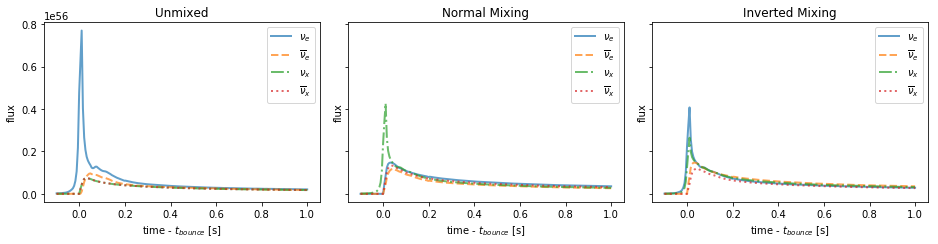

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(13,3.5), sharex=True, sharey=True)

ax1, ax2, ax3 = axes
t = np.linspace(-0.1, 1, 201) * u.s

# UNMIXED
for ls, flavor in zip(["-", "--", "-.", ":"], Flavor):
    flux = ccsn.get_flux(t, flavor)
    
    ax1.plot(t, flux, ls, lw=2, label=flavor.to_tex(), alpha=0.7)
    ax1.set_title("Unmixed")
# plt.yscale('log')
# plt.ylim(3e51, 5e53)
ax1.set(xlabel='time - $t_{bounce}$ [s]',
        ylabel='flux')
ax1.legend()

# NORMAL MIXING
nu_list1 = []
i = 0
for flavor in Flavor:
    flux = ccsn.get_flux(t, flavor)
    nu_list1.append(flux)
    
nu_new1 = mix.normal_mixing(nu_list1)

for ls, i, flavor in zip(["-", "--", "-.", ":"], range(len(nu_new1)), Flavor):
    new_flux1 = nu_new1[i]
    ax2.plot(t, new_flux1, ls, lw=2, alpha=0.7, label=flavor.to_tex())
    ax2.set_title(label="Normal Mixing")

ax2.set(xlabel='time - $t_{bounce}$ [s]',
        ylabel='flux')

ax2.legend()

# INVERTED MIXING
nu_list2 = []
i = 0
for flavor in Flavor:
    flux = ccsn.get_flux(t, flavor)
    nu_list2.append(flux)
    
nu_new2 = mix.inverted_mixing(nu_list1)

for ls, i, flavor in zip(["-", "--", "-.", ":"], range(len(nu_new2)), Flavor):
    new_flux2 = nu_new2[i]
    ax3.plot(t, new_flux2, ls, lw=2, alpha=0.7, label=flavor.to_tex())
    ax3.set_title(label="Inverted Mixing")

ax3.set(xlabel='time - $t_{bounce}$ [s]',
        ylabel='flux')
ax3.legend()


fig.tight_layout();